In [2]:
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
results = Path.home()/'group'/'project'/'scripting'/\
'output'/'230316_match_est_pmin855_pmax885_lmin20_lmax53_nlog41'

result_paths = list(results.glob('**/*.npz'))

In [4]:
file = np.load(result_paths[0])

In [5]:
list(file.keys())

['mean_match', 'hist_n', 'hist_bins']

In [6]:
match = np.zeros(41)
hist_n = np.zeros((41, 201))
hist_bins = np.zeros((41, 202))

template_N = np.logspace(2, 5.3, 41)

In [7]:
for i in range(match.size):
    
    idx = int(result_paths[i].parts[-2].split('idx')[-1])
    match[idx] = np.load(result_paths[i])['mean_match']
    hist_n[idx, :] = np.load(result_paths[i])['hist_n']
    hist_bins[idx, :] = np.load(result_paths[i])['hist_bins']

In [8]:
sns.set_theme(context='paper', style='whitegrid', font_scale=1.65)

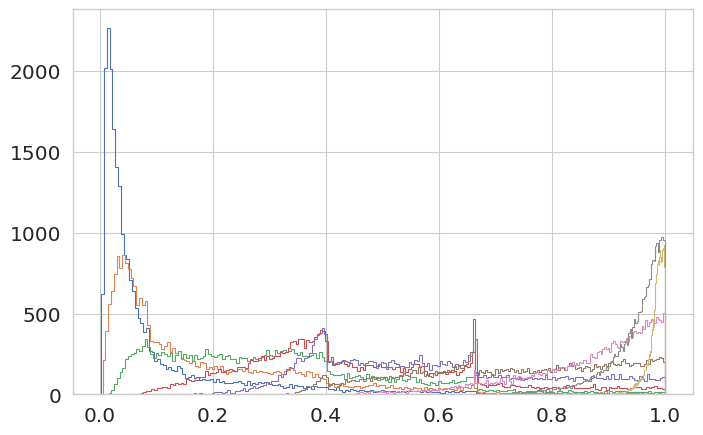

In [9]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

for i in [0,5,10,15,20,25,30,35,40]:
    
    ax.stairs(hist_n[i, :], hist_bins[i, :])

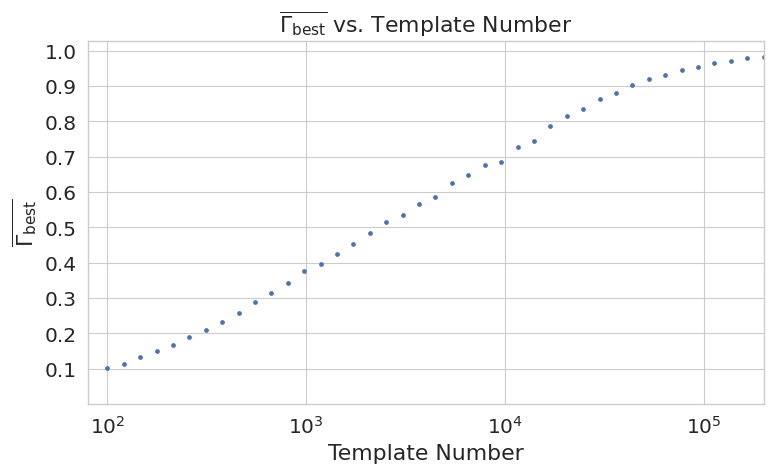

In [22]:
sns.set_style('whitegrid',)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.plot(template_N, match, '.')

ax.set_xscale('log')

yticks=ax.set_yticks( np.linspace(0,1,6))
yticks = ax.set_yticks(np.linspace(0.1, 0.9, 5), minor=True)

ax.set_xlabel('Template Number')
ax.set_ylabel(r'$\overline{\Gamma_\mathrm{best}}$')
ax.set_title(r'$\overline{\Gamma_\mathrm{best}}$ vs. Template Number')


ax.yaxis.grid(True, which='minor')
ax.set_yticks(np.arange(0.1,1.1, 0.1), minor=False)
#ax.set_yticks(np.arange(0.05,1.05, 0.1), minor=True)

ax.set_xlim(8e1, 2e5)
plt.tight_layout(pad=1.05)

plt.savefig(Path.home()/'group'/'project'/'plots'/'230915_mean_match_vs_templates', dpi=144)

In [11]:
for i in zip (match, template_N):
    print(i)

(0.10301767564680869, 100.0)
(0.11381515843471936, 120.92051829432084)
(0.13159495982727287, 146.21771744567184)
(0.14936667748105203, 176.80722177343196)
(0.16566437351109428, 213.79620895022325)
(0.18837978396334049, 258.52348395621914)
(0.2084211817538, 312.6079367123956)
(0.23251301353838288, 378.00713730181087)
(0.2586197140885639, 457.0881896148752)
(0.2884904800588428, 552.7134079444345)
(0.31359470526009325, 668.3439175686149)
(0.342427170253868, 808.1649291125368)
(0.37693826745767905, 977.2372209558101)
(0.3974399154283981, 1181.6803125447832)
(0.4250918104530011, 1428.8939585111023)
(0.4520678197630697, 1727.8259805078628)
(0.4832061414482973, 2089.296130854039)
(0.5142948465980893, 2526.3877101318953)
(0.5333233739102724, 3054.9211132155124)
(0.5666035199889019, 3694.0264435828335)
(0.5843234642587652, 4466.835921509631)
(0.6245047219610473, 5401.3211476463475)
(0.6465620117433627, 6531.305526474716)
(0.6768615667467406, 7897.688493998856)
(0.6843487526593075, 9549.92586021

In [59]:
template_N[-5]

93325.43007969906